In [10]:
from sklearn.datasets import fetch_mldata 
import matplotlib.pyplot as plt 
%matplotlib inline
import numpy as np
mnist = fetch_mldata('MNIST original')

In [5]:
mnist

{'COL_NAMES': ['label', 'data'],
 'DESCR': 'mldata.org dataset: mnist-original',
 'data': array([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ..., 
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]], dtype=uint8),
 'target': array([ 0.,  0.,  0., ...,  9.,  9.,  9.])}

In [8]:
images = mnist.data
target = mnist.target

# Plotting Examples of 2s and 7s

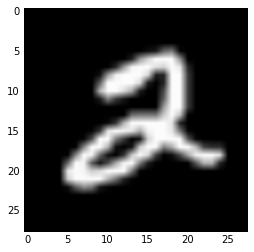

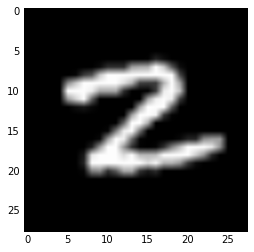

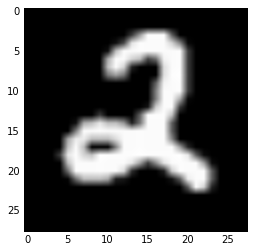

In [19]:
plt.gray() 
plt.imshow(images[target==2][0].reshape(28,28)) 
plt.show()
plt.gray() 
plt.imshow(images[target==2][10].reshape(28,28)) 
plt.show()
plt.gray() 
plt.imshow(images[target==2][20].reshape(28,28)) 
plt.show()

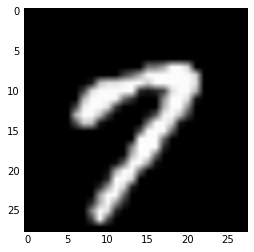

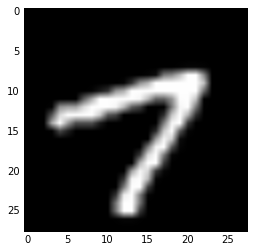

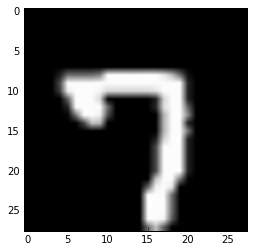

In [20]:
plt.gray() 
plt.imshow(images[target==7][0].reshape(28,28)) 
plt.show()
plt.gray() 
plt.imshow(images[target==7][10].reshape(28,28)) 
plt.show()
plt.gray() 
plt.imshow(images[target==7][20].reshape(28,28)) 
plt.show()

In [21]:
labels_2_or_7 = target[np.logical_or(target==2, target==7)] #distinguish 2 and 7
images_2_or_7 = images[np.logical_or(target==2, target==7)]

In [26]:
#Create train-test split
from sklearn.model_selection import train_test_split
images_2_or_7_train, images_2_or_7_test, labels_2_or_7_train, labels_2_or_7_test = train_test_split(images_2_or_7, labels_2_or_7, test_size=0.3, random_state=42)

In [27]:
print "The number of train images: ", len(images_2_or_7_train)
print "The number of test images: ", len(images_2_or_7_test)

The number of train images:  9998
The number of test images:  4285


In [48]:
from sklearn import metrics

# Training an SVM with a Linear Kernel

In order to try out different settings of the SVM, I split the training set into validation folds and report the classification metrics on the validation fold after fitting the SVM on the training fold. Using the linear kernel, we can see that training time is approximately 1.8 seconds for both folds. The accuracy on the validation fold is quite high, about 97.5%

In [83]:
from sklearn.model_selection import KFold
from sklearn.svm import SVC
import time
kf = KFold(n_splits=2, shuffle=True)
for train, test in kf.split(images_2_or_7_train):
    linear_clf = SVC(kernel='linear',C=4)
    tic = time.time()
    linear_clf.fit(images_2_or_7_train[train], labels_2_or_7_train[train])
    toc = time.time()
    print "Training time is %f seconds" %( toc-tic)
#     print clf.score(images_2_or_7_train[test], labels_2_or_7_train[test])
    print metrics.classification_report(labels_2_or_7_train[test], linear_clf.predict(images_2_or_7_train[test]))
    print metrics.confusion_matrix(labels_2_or_7_train[test], linear_clf.predict(images_2_or_7_train[test]))
    print metrics.accuracy_score(labels_2_or_7_train[test], linear_clf.predict(images_2_or_7_train[test]))
#     print("%s %s" % (train, test))

Training time is 2.263565 seconds
             precision    recall  f1-score   support

        2.0       0.98      0.97      0.98      2424
        7.0       0.98      0.98      0.98      2575

avg / total       0.98      0.98      0.98      4999

[[2361   63]
 [  49 2526]]
0.977595519104
Training time is 2.129323 seconds
             precision    recall  f1-score   support

        2.0       0.98      0.97      0.98      2440
        7.0       0.98      0.98      0.98      2559

avg / total       0.98      0.98      0.98      4999

[[2379   61]
 [  56 2503]]
0.976595319064


In [58]:
print (labels_2_or_7_train[test] == 2).shape

(4999,)


These are 2s that the SVM classified as 7s. This is visually understandable because these 2s look quite like 7s, especially if the characteristic loop isn't clear.

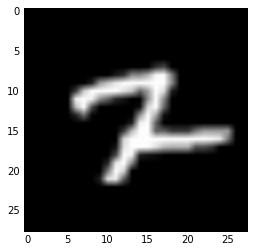

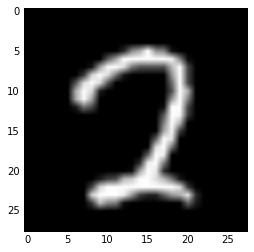

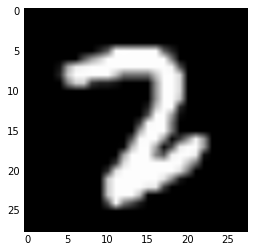

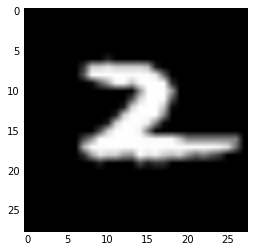

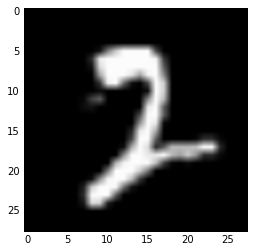

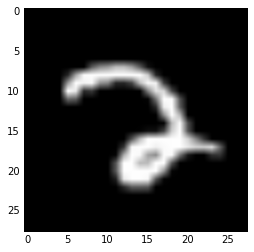

In [68]:
false_7 = (np.logical_and(labels_2_or_7_train[test] == 2, clf.predict(images_2_or_7_train[test]) == 7))
for i in range(0,60,10):
    plt.gray() 
    plt.imshow(images_2_or_7_train[test][false_7][i].reshape(28,28)) 
    plt.show()


These are images the SVM thought was a 2 but was actually a 7. Visually, it's a lot more puzzling in this case because these 7s don't look much like 2s.

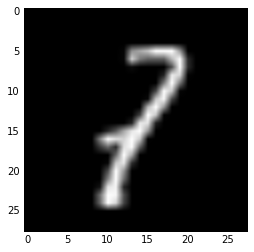

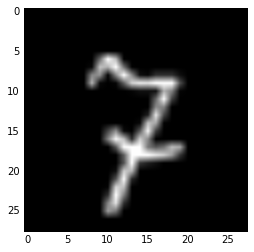

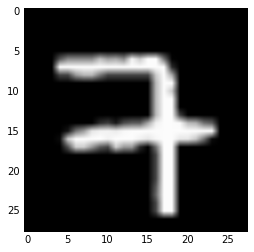

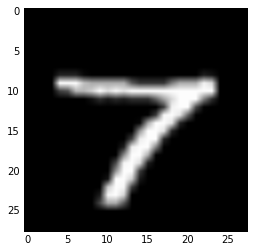

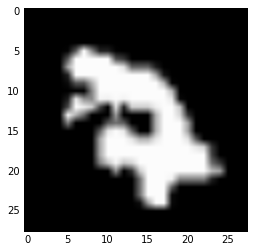

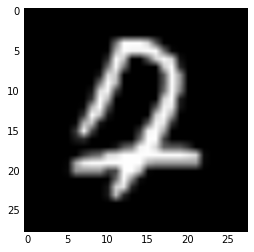

In [69]:
false_2 = (np.logical_and(labels_2_or_7_train[test] == 7, clf.predict(images_2_or_7_train[test]) == 2))
for i in range(0,60,10):
    plt.gray() 
    plt.imshow(images_2_or_7_train[test][false_2][i].reshape(28,28)) 
    plt.show()

# Training an SVM with a Polynomial Kernel

Using the polynomial kernel, we can see that training time is approximately 2.0 seconds for both folds. The accuracy on the validation fold is very high (and higher the the linear kernel), about 99.0%. This shows that the SVM doesn't overfit even if we use more flexible kernels.

In [85]:
for train, test in kf.split(images_2_or_7_train):
    poly_clf = SVC(kernel='poly',C=4)
    tic = time.time()
    poly_clf.fit(images_2_or_7_train[train], labels_2_or_7_train[train])
    toc = time.time()
    print "Training time is %f seconds" %( toc-tic)
#     print clf.score(images_2_or_7_train[test], labels_2_or_7_train[test])
    print metrics.classification_report(labels_2_or_7_train[test], poly_clf.predict(images_2_or_7_train[test]))
    print metrics.confusion_matrix(labels_2_or_7_train[test], poly_clf.predict(images_2_or_7_train[test]))
    print metrics.accuracy_score(labels_2_or_7_train[test], poly_clf.predict(images_2_or_7_train[test]))
#     print("%s %s" % (train, test))

Training time is 2.701011 seconds
             precision    recall  f1-score   support

        2.0       0.99      0.99      0.99      2472
        7.0       0.99      0.99      0.99      2527

avg / total       0.99      0.99      0.99      4999

[[2452   20]
 [  20 2507]]
0.99199839968
Training time is 2.326732 seconds
             precision    recall  f1-score   support

        2.0       0.99      0.99      0.99      2392
        7.0       0.99      0.99      0.99      2607

avg / total       0.99      0.99      0.99      4999

[[2371   21]
 [  23 2584]]
0.991198239648


# Training an SVM with an RBF Kernel

Using the RBF kernel, we can see that training time is approximately 2.0 seconds for both folds. The accuracy on the validation fold is very high (and higher the the linear kernel), about 99.0%. This shows that the SVM doesn't overfit even if we use more flexible kernels. To increase validation accuracy, I had to decrease gamma to 1e-5. This is because if gamma is too high, the exponential term in the radial basis kernel is too low. Therefore the weight vector is learned on a set of features that are nearly all zero. This would lead to pathological behavior where the SVM predicts all 2s or all 7s. Thus, we need to set gamma to be very low so that there are some features. However, the radial basis function kernel takes much longer to train. This might be because in a high dimensional input space, a larger number of basis functions is required due to the curse of dimensionality. We have to make the tradeoff between computational simplicity and completely lining the input space.

In [86]:
for train, test in kf.split(images_2_or_7_train):
    rbf_clf = SVC(kernel='rbf',C=4,gamma=0.000001)
    tic = time.time()
    rbf_clf.fit(images_2_or_7_train[train], labels_2_or_7_train[train])
    print clf.get_params()
    toc = time.time()
    print "Training time is %f seconds" %( toc-tic)
#     print clf.score(images_2_or_7_train[test], labels_2_or_7_train[test])
    print metrics.classification_report(labels_2_or_7_train[test], rbf_clf.predict(images_2_or_7_train[test]))
    print metrics.confusion_matrix(labels_2_or_7_train[test], rbf_clf.predict(images_2_or_7_train[test]))
    print metrics.accuracy_score(labels_2_or_7_train[test], rbf_clf.predict(images_2_or_7_train[test]))
    print metrics.r2_score(labels_2_or_7_train[test], rbf_clf.predict(images_2_or_7_train[test]))
#     print("%s %s" % (train, test))

{'kernel': 'rbf', 'C': 4, 'verbose': False, 'probability': False, 'degree': 3, 'shrinking': True, 'max_iter': -1, 'decision_function_shape': 'ovr', 'random_state': None, 'tol': 0.001, 'cache_size': 200, 'coef0': 0.0, 'gamma': 1e-06, 'class_weight': None}
Training time is 20.317755 seconds
             precision    recall  f1-score   support

        2.0       0.98      1.00      0.99      2431
        7.0       1.00      0.99      0.99      2568

avg / total       0.99      0.99      0.99      4999

[[2419   12]
 [  38 2530]]
0.9899979996
0.959961927389
{'kernel': 'rbf', 'C': 4, 'verbose': False, 'probability': False, 'degree': 3, 'shrinking': True, 'max_iter': -1, 'decision_function_shape': 'ovr', 'random_state': None, 'tol': 0.001, 'cache_size': 200, 'coef0': 0.0, 'gamma': 1e-06, 'class_weight': None}
Training time is 13.523762 seconds
             precision    recall  f1-score   support

        2.0       0.98      1.00      0.99      2433
        7.0       1.00      0.98      0.99 

# Test Set Error

We can see that the three SVMs using different kernels have very similar validation accuracies. Their difference could be down to the different sets that they were trained on. Still, based on validation accuracies, I predict that the polynomial SVM would perform best on the test set, followed by the RBF SVM and the linear SVM.

In [89]:
print "The confusion matrix for the linear SVM is:"
print metrics.confusion_matrix(labels_2_or_7_test, linear_clf.predict(images_2_or_7_test))
print "The accuracy for the linear SVM is:"
print metrics.accuracy_score(labels_2_or_7_test, linear_clf.predict(images_2_or_7_test))

print "The confusion matrix for the polynomial SVM is:"
print metrics.confusion_matrix(labels_2_or_7_test, poly_clf.predict(images_2_or_7_test))
print "The accuracy for the polynomial SVM is:"
print metrics.accuracy_score(labels_2_or_7_test, poly_clf.predict(images_2_or_7_test))

print "The confusion matrix for the RBF SVM is:"
print metrics.confusion_matrix(labels_2_or_7_test, rbf_clf.predict(images_2_or_7_test))
print "The accuracy for the RBF SVM is:"
print metrics.accuracy_score(labels_2_or_7_test, rbf_clf.predict(images_2_or_7_test))

The confusion matrix for the linear SVM is:
[[2079   47]
 [  49 2110]]
The accuracy for the linear SVM is:
0.977596266044
The confusion matrix for the polynomial SVM is:
[[2111   15]
 [  16 2143]]
The accuracy for the polynomial SVM is:
0.99276546091
The confusion matrix for the RBF SVM is:
[[2119    7]
 [  35 2124]]
The accuracy for the RBF SVM is:
0.990198366394
